<a href="https://colab.research.google.com/github/higegiraffe/wave/blob/master/Wave1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import wave
import struct
from scipy import fromstring, int16
import numpy as np
from pylab import *
%matplotlib inline

In [0]:
# ローカルファイルを直接アップロードする
from google.colab import files
uploaded = files.upload()

Saving 08_af.wav to 08_af.wav


In [0]:
ls

07_af.wav   07.WAV     08_off.wav  09_off.wav
07_off.wav  08_af.wav  09-af.wav   sample_data/


In [0]:
# 読み込みするWaveファイル指定

wavfile = '09-af.wav'

In [0]:
#Waveファイルの読み込み

wr = wave.open(wavfile, 'rb')
ch = wr.getnchannels()
width = wr.getsampwidth()
fr = wr.getframerate()
fn = wr.getnframes()

origin = wr.readframes(-1)
# data = origin[:fn * ch * width]
wr.close()

In [0]:
#Waveファイル情報表示

print('チャンネル', ch)
print('サンプルサイズ',width)
print('フレームレート',fr)
print('フレーム数', fn)
print('サンプル時間', fn / fr, '秒')

チャンネル 2
サンプルサイズ 2
フレームレート 44100
フレーム数 56839
サンプル時間 1.2888662131519275 秒


In [0]:
# LRチャンネル分けて、データ読み込み

if width == 2:
    X = np.frombuffer(origin, dtype='int16')
    X = X / 32768.0
elif width == 4:
    X = np.frombuffer(origin, dtype='int32')
    X = X / 2147483648.0
left = X[::2]
right = X[1::2]

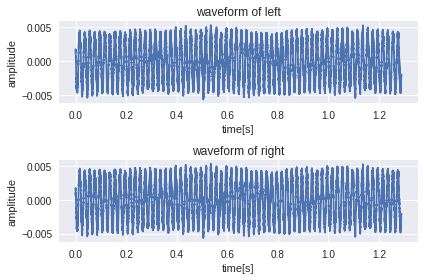

In [0]:
#Wavr波形の表示

length = fn / fr                        # 音声の長さ(sec)
time = np.arange(0, length, 1/fr)       # 各サンプルに対応する時刻の列

plt.subplot(2,1,1)
plt.plot(time, left)                    # 音声波形の表示
plt.title('waveform of left')           # タイトル設定
plt.xlabel('time[s]')                     # 横軸ラベル設定
plt.ylabel('amplitude')                   # 縦軸ラベル設定
# plt.ylim([-1, 1])                         # 縦軸表示範囲設定
# plt.xlim([0, 0.01])                      # 横軸表示範囲設定

plt.subplot(2,1,2)
plt.plot(time, right)
plt.title('waveform of right')            # タイトル設定
plt.xlabel('time[s]')                     # 横軸ラベル設定
plt.ylabel('amplitude')                   # 縦軸ラベル設定
# plt.ylim([-1, 1])                         # 縦軸表示範囲設定
# plt.xlim([1, 1.01])　　　　　　　　　　　# 横軸表示範囲設定

plt.tight_layout()  # タイトルの被りを防ぐ

In [0]:
#ピークレベル表示　(dBFS)

#ピーク値を検索
l_max = max(left)
l_min = min(left)

if abs(l_max) > abs(l_min):
  l_peak = abs(l_max)
else:
  l_peak = abs(l_min)
 
r_max = max(right)
r_min = min(right)

if abs(r_max) > abs(r_min):
  r_peak = abs(r_max)
else:
  r_peak = abs(r_min)

#ピーク値をdBFS換算
l_peak_dbfs = 20*log(l_peak)/log(10)
r_peak_dbfs = 20*log(r_peak)/log(10)

print('l_peak_dbfs =',l_peak_dbfs)
print('r_peak_dbfs =',r_peak_dbfs)

l_peak_dbfs = -36.793431865712655
r_peak_dbfs = -37.053842065562876


In [0]:
#波形のフーリエ変換

print('総サンプル数の２のｘ乗 =',(log(len(time))/log(2)))    #総サンプル数の２のｘ乗
n0 = 0                                        # サンプリング開始位置(s)
N = 2**int(log(len(time))/log(2))             # サンプル数
G = np.fft.fft(left[n0:n0+N])                  # 高速フーリエ変換
G_abs = np.abs(G)                            # 振幅スペクトル
G_abs_amp = G_abs / N * 2                    # スペクトルを元の振幅にそろえる
flist = np.fft.fftfreq(N, d=1.0/fr)             # 周波数リスト

総サンプル数の２のｘ乗 = 17.68391982976158


In [0]:
G_abs_amp_db = 20*log(G_abs_amp)/log(10)     # dBFS換算

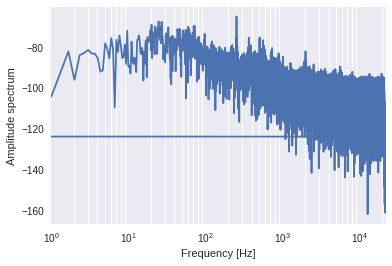

In [0]:
# 振幅スペクトルを描画

#スペクトル、リニア表示
#plt.plot(flist[:int(N/2)+1], G_abs_amp[:int(N/2)+1], linestyle='-')

#スペクトル、dBFS表示
plt.plot(flist[:int(N/2)+1], G_abs_amp_db[:int(N/2)+1], linestyle='-')

plt.xlim([1, fr/2]) 

plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude spectrum")

ax = plt.gca()
ax.set_xscale('log')
plt.grid(which="both")
 
plt.show()